In [83]:
%load_ext autoreload
%autoreload 2

import functions_master as fm
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import statistics

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<AxesSubplot:xlabel='Date'>

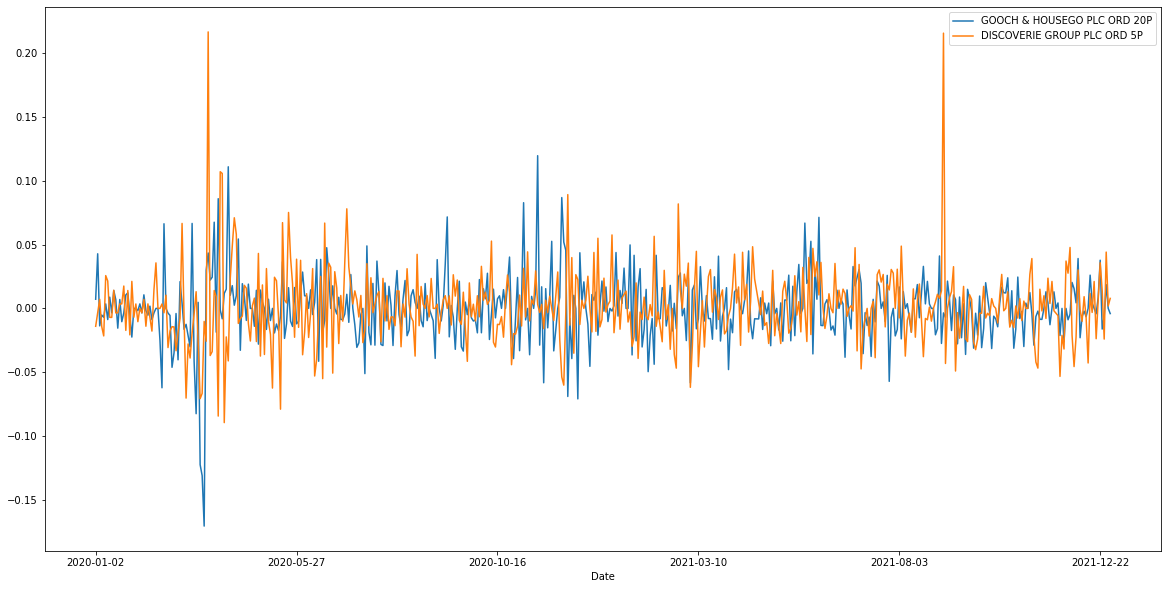

In [108]:
raw_data = pd.read_csv("data/export.csv", parse_dates=True)

company_id_1 = 'GHH.XLON'
company_id_2 = 'DSCV.XLON'
df_name = raw_data

start_date = '2020-01-01'
end_date =  '2021-12-31'
metric = 'close'

returns = fm.compare_returns (company_id_1, company_id_2, df_name, start_date, end_date, metric)
returns.plot(figsize=(20, 10))

In [226]:
returns

,GOOCH & HOUSEGO PLC ORD 20P,DISCOVERIE GROUP PLC ORD 5P
Date,,
2020-01-02,0.007194,-0.014035
2020-01-03,0.042857,-0.003559
2020-01-06,-0.013699,0.007143
2020-01-07,-0.005208,-0.014184
2020-01-08,-0.006981,-0.021583
...,...,...
2021-12-23,-0.016194,0.014242
2021-12-24,-0.006173,-0.024072
2021-12-29,0.018634,0.044193


In [227]:
volatility = returns.std()
volatility

GOOCH & HOUSEGO PLC ORD 20P    0.026479
DISCOVERIE GROUP PLC ORD 5P    0.029518
dtype: float64

In [228]:
# Annualizing volatility
annualized_vol = volatility*np.sqrt(12)
annualized_vol

GOOCH & HOUSEGO PLC ORD 20P    0.091725
DISCOVERIE GROUP PLC ORD 5P    0.102252
dtype: float64

In [229]:
n_months = pd.to_datetime(returns.index).month.unique().shape[0]
return_per_month =( returns+1).prod()**(1/n_months) - 1
return_per_month

GOOCH & HOUSEGO PLC ORD 20P   -0.010475
DISCOVERIE GROUP PLC ORD 5P    0.050202
dtype: float64

In [230]:
annualized_return = (return_per_month+1)**12 - 1
annualized_return

GOOCH & HOUSEGO PLC ORD 20P   -0.118705
DISCOVERIE GROUP PLC ORD 5P    0.800000
dtype: float64

In [231]:
annualized_return = ( returns+1).prod()**(12/n_months) - 1
annualized_return

GOOCH & HOUSEGO PLC ORD 20P   -0.118705
DISCOVERIE GROUP PLC ORD 5P    0.800000
dtype: float64

In [232]:
annualized_return/annualized_vol

GOOCH & HOUSEGO PLC ORD 20P   -1.294138
DISCOVERIE GROUP PLC ORD 5P    7.823795
dtype: float64

In [233]:
riskfree_rate = 0.03
excess_return = annualized_return - riskfree_rate
sharp_ratio = excess_return/annualized_vol
sharp_ratio

GOOCH & HOUSEGO PLC ORD 20P   -1.621203
DISCOVERIE GROUP PLC ORD 5P    7.530402
dtype: float64

<AxesSubplot:xlabel='Date'>

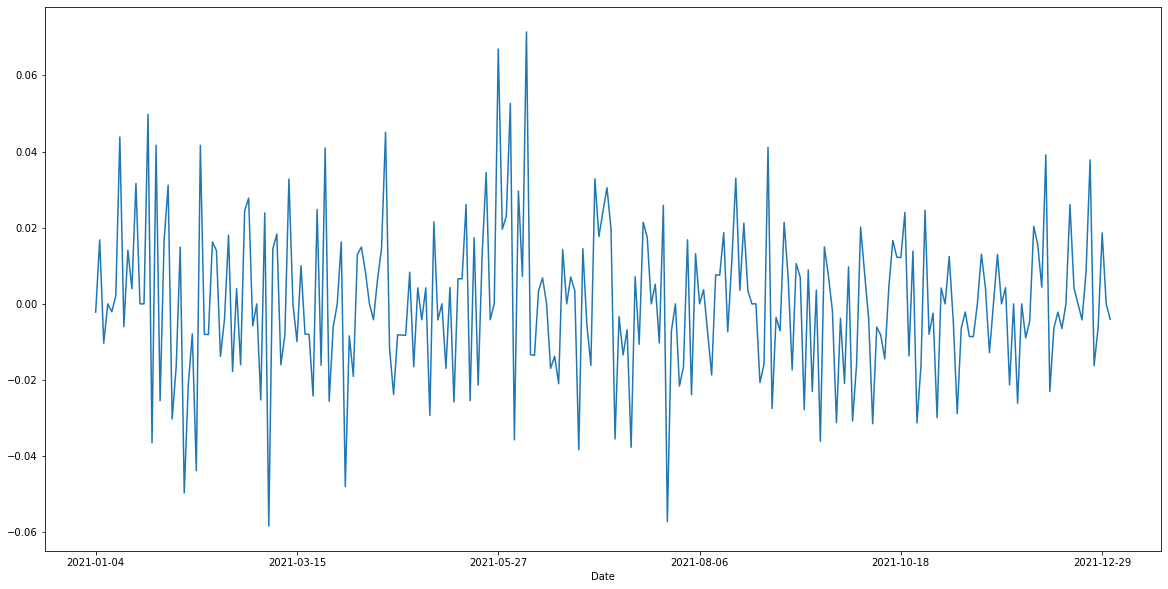

In [63]:
returns2=fm.get_returns_single_metric (company_id_1, df_name, start_date, end_date, metric)
returns2.plot(figsize=(20, 10))

In [11]:
drawdown.min()

GOOCH & HOUSEGO PLC ORD 20P   -0.541096
DISCOVERIE GROUP PLC ORD 5P   -0.354949
dtype: float64

In [22]:
drawdown.idxmin()

GOOCH & HOUSEGO PLC ORD 20P    2020-03-18
DISCOVERIE GROUP PLC ORD 5P    2020-03-19
dtype: object

<AxesSubplot:xlabel='Date'>

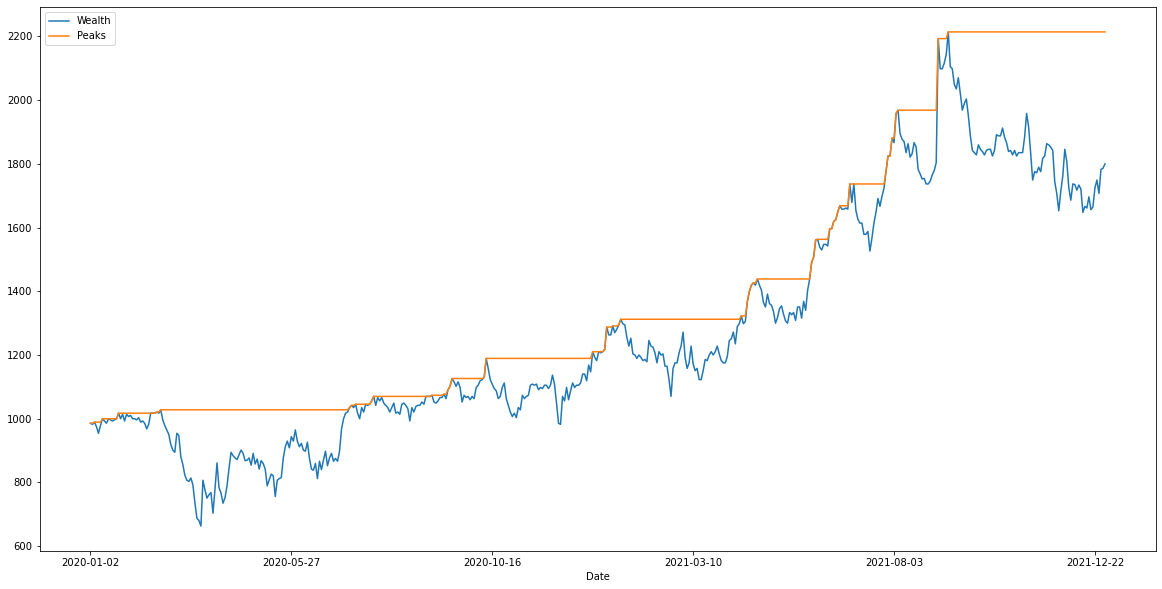

In [14]:
fm.get_drawdown(returns2)[['Wealth', 'Peaks']].plot(figsize=(20, 10))

<AxesSubplot:xlabel='Date'>

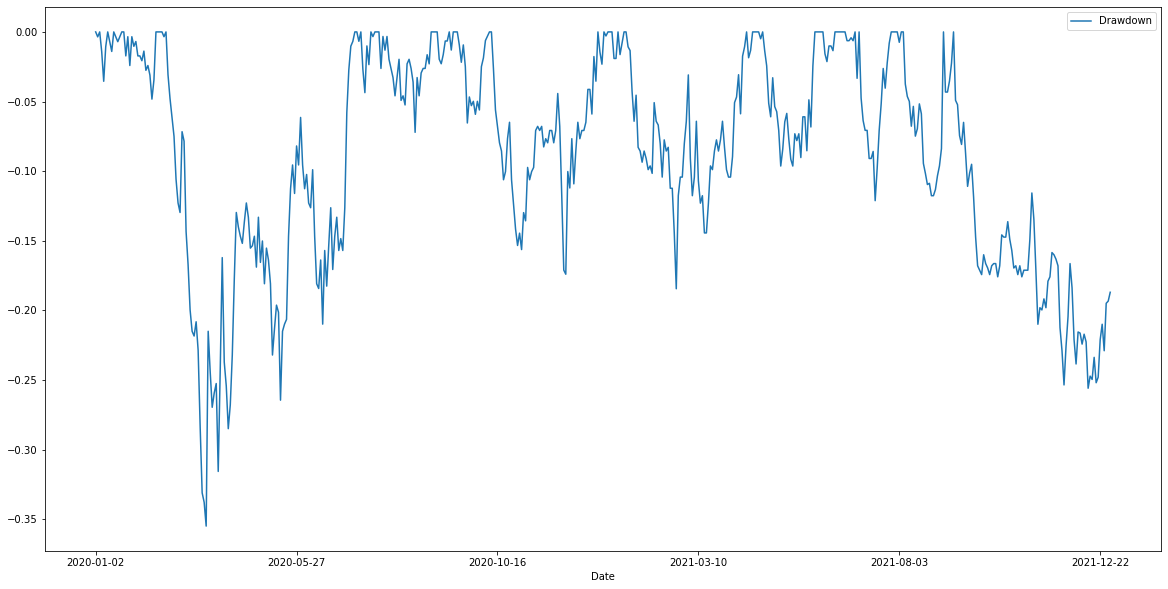

In [15]:
fm.get_drawdown(returns2)[['Drawdown']].plot(figsize=(20, 10))

In [26]:
pd.concat([returns.mean(), returns.median(), returns.mean()>returns.median()], axis="columns")

,0,1,2
GOOCH & HOUSEGO PLC ORD 20P,0.000104,0.0,True
DISCOVERIE GROUP PLC ORD 5P,0.001585,0.0,True


In [28]:
scipy.stats.skew(returns)

array([-0.40992109,  1.62896154])

In [30]:
scipy.stats.kurtosis(returns)

array([ 6.64350269, 11.00847362])

In [33]:
returns.aggregate(scipy.stats.jarque_bera)

,GOOCH & HOUSEGO PLC ORD 20P,DISCOVERIE GROUP PLC ORD 5P
0,944.707675,2778.795018
1,0.000000,0.000000


array([[<AxesSubplot:title={'center':'GOOCH & HOUSEGO PLC ORD 20P'}>,
        <AxesSubplot:title={'center':'DISCOVERIE GROUP PLC ORD 5P'}>]],
      dtype=object)

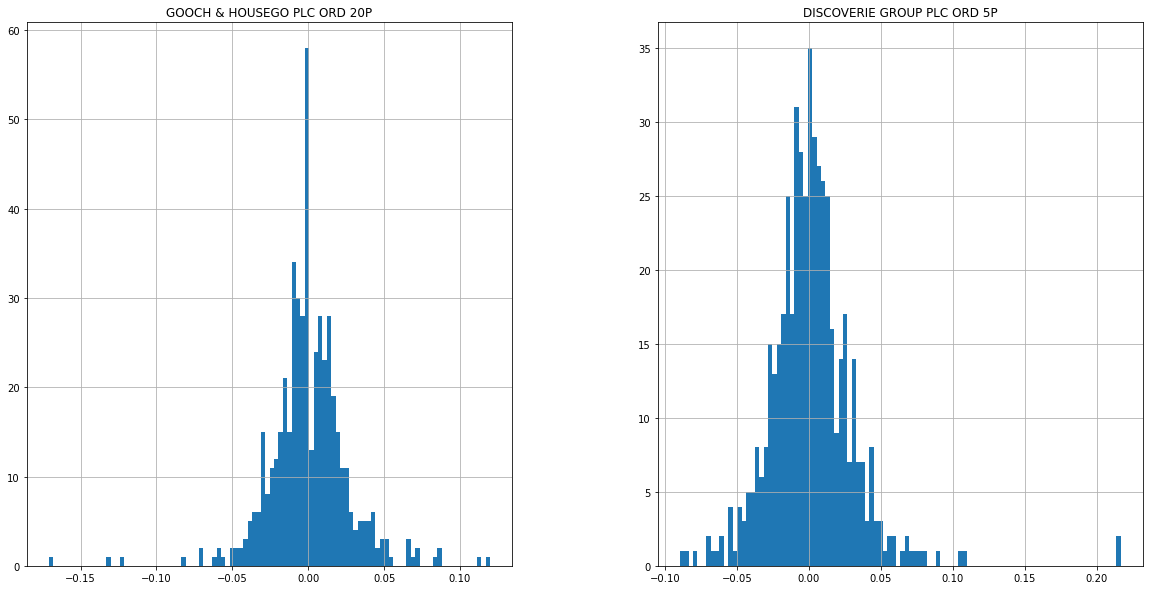

In [110]:
returns.hist(bins=100, figsize=(20, 10))

In [118]:
# Semidiviation

returns[returns<0].std(ddof=0)

GOOCH & HOUSEGO PLC ORD 20P    0.019986
DISCOVERIE GROUP PLC ORD 5P    0.016388
dtype: float64